In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
!mkdir ~/.kaggle

# copying api file
!cp drive/MyDrive/kaggle.json ~/.kaggle/
# modding permission
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
# downloading data using api command from the site
!kaggle datasets download -d ardikasatria/datasettanamanpadisumatera
# unzip the downloaded file
!unzip datasettanamanpadisumatera.zip

  0% 0.00/4.75k [00:00<?, ?B/s]
100% 4.75k/4.75k [00:00<00:00, 15.4MB/s]
Archive:  datasettanamanpadisumatera.zip
  inflating: Data_Tanaman_Padi_Sumatera_version_1.csv  


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.decomposition import PCA

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
data = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')

print(data.head())

  Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
0     Aceh   1993  1329536.0    323589.0       1627.0       82.00   
1     Aceh   1994  1299699.0    329041.0       1521.0       82.12   
2     Aceh   1995  1382905.0    339253.0       1476.0       82.72   
3     Aceh   1996  1419128.0    348223.0       1557.0       83.00   
4     Aceh   1997  1368074.0    337561.0       1339.0       82.46   

   Suhu rata-rata  
0           26.06  
1           26.92  
2           26.27  
3           26.08  
4           26.31  


In [12]:
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [63]:
categorical_data = data.copy()

In [64]:

categorical_data['Category Curah Hujan'] = pd.qcut(categorical_data['Curah hujan'], 8, labels=[1,2,3,4,5,6,7,8])


categorical_data['Category Kelembapan'] = pd.qcut(categorical_data['Kelembapan'], 8, labels=[1,2,3,4,5,6,7,8])


categorical_data['Category Suhu rata-rata'] = pd.qcut(categorical_data['Suhu rata-rata'], 8, labels=[1,2,3,4,5,6,7,8])

categorical_data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Category Curah Hujan,Category Kelembapan,Category Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06,2,4,2
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92,2,4,5
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27,2,5,3
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08,2,5,2
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31,1,5,3
...,...,...,...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45,5,3,3
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36,3,2,3
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50,1,2,1
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23,3,2,7


In [15]:
rainfall_quintiles = categorical_data['Curah hujan'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])
categorical_data['Category Curah Hujan'] = pd.qcut(categorical_data['Curah hujan'], 5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

humidity_quintiles = categorical_data['Kelembapan'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])
categorical_data['Category Kelembapan'] = pd.qcut(categorical_data['Kelembapan'], 5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

temp_quintiles = categorical_data['Suhu rata-rata'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])
categorical_data['Category Suhu rata-rata'] = pd.qcut(categorical_data['Suhu rata-rata'], 5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

categorical_data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Category Curah Hujan,Category Kelembapan,Category Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06,Low,Moderate,Low
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92,Very Low,Moderate,High
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27,Very Low,Moderate,Low
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08,Very Low,Moderate,Low
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31,Very Low,Moderate,Low
...,...,...,...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45,Moderate,Low,Low
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36,Low,Very Low,Low
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50,Very Low,Very Low,Very Low
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23,Low,Very Low,High


In [65]:
categorical_data.drop('Curah hujan', axis=1, inplace=True)
categorical_data.drop('Kelembapan', axis=1, inplace=True)
categorical_data.drop('Suhu rata-rata', axis=1, inplace=True)
categorical_data.drop('Provinsi', axis=1, inplace=True)

categorical_data.drop('Luas Panen', axis=1, inplace=True)

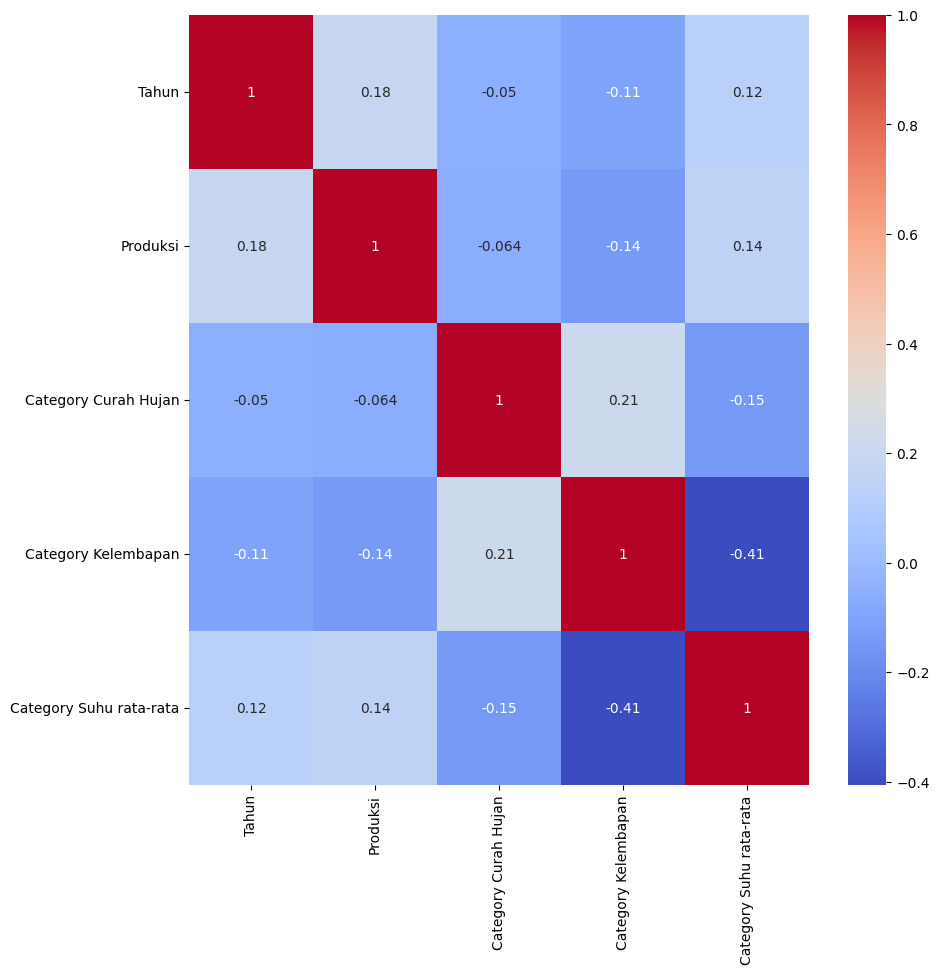

In [66]:
correlation_matrix = categorical_data.corr(numeric_only=False)

corr_matrix = plt.subplots(figsize=(10,10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<ipython-input-19-321c58c1c4e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = categorical_data.corr()


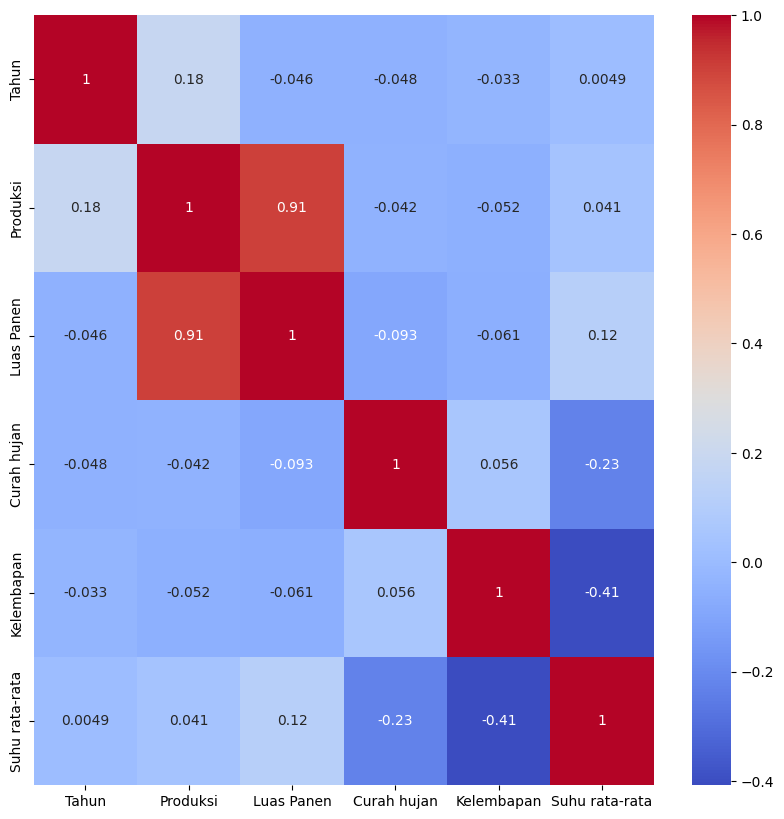

In [19]:
correlation_matrix = categorical_data.corr()

corr_matrix = plt.subplots(figsize=(10,10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<ipython-input-8-132ec5eff4d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


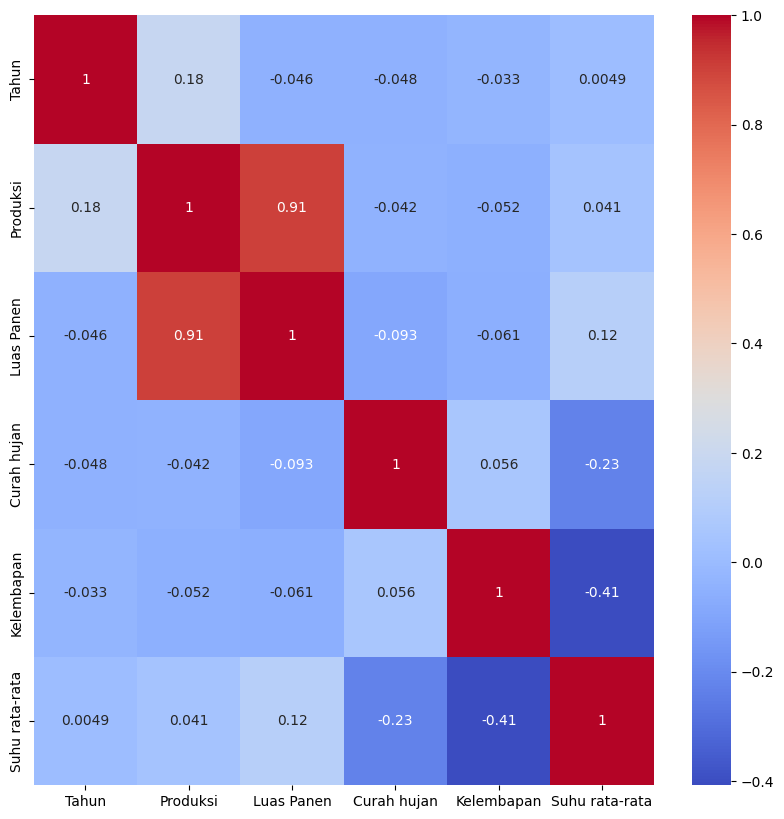

In [ ]:


correlation_matrix = data.corr()

corr_matrix = plt.subplots(figsize=(10,10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [ ]:
provinces = np.unique(np.array(data['Provinsi']))

provinces

array(['Aceh', 'Bengkulu', 'Jambi', 'Lampung', 'Riau', 'Sumatera Barat',
       'Sumatera Selatan', 'Sumatera Utara'], dtype=object)

In [ ]:
data = data.groupby(data.Provinsi)

Aceh
  Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
0     Aceh   1993  1329536.0    323589.0       1627.0       82.00   
1     Aceh   1994  1299699.0    329041.0       1521.0       82.12   
2     Aceh   1995  1382905.0    339253.0       1476.0       82.72   
3     Aceh   1996  1419128.0    348223.0       1557.0       83.00   
4     Aceh   1997  1368074.0    337561.0       1339.0       82.46   

   Suhu rata-rata  
0           26.06  
1           26.92  
2           26.27  
3           26.08  
4           26.31  
R squared: -35.3128
Mean Absolute Error: 207344.98387639804
Mean Square Error: 63736985769.895325
Root Mean Square Error: 252461.85012768826
Bengkulu
     Provinsi  Tahun  Produksi  Luas Panen  Curah hujan  Kelembapan  \
168  Bengkulu   1993  356709.0    109807.0       4150.0       85.50   
169  Bengkulu   1994  334232.0    104747.0       2043.0       85.32   
170  Bengkulu   1995  377337.0    115914.0       4478.0       85.49   
171  Bengkulu   1996  3969

<ipython-input-28-06c51de22e3b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_provinsi['Climate Variable'] = climate_data
<ipython-input-28-06c51de22e3b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_provinsi['Climate Variable'] = climate_data


R squared: 50.0632
Mean Absolute Error: 62770.230418434105
Mean Square Error: 5285387743.6230345
Root Mean Square Error: 72700.67223639018
Jambi
    Provinsi  Tahun  Produksi  Luas Panen  Curah hujan  Kelembapan  \
112    Jambi   1993  607529.0    199431.0       1954.0       83.81   
113    Jambi   1994  564722.0    184029.0       1824.0       81.25   
114    Jambi   1995  593502.0    193666.0       2290.1       83.96   
115    Jambi   1996  657650.0    215975.0       2309.1       83.60   
116    Jambi   1997  572269.0    190608.0       1030.1       80.64   

     Suhu rata-rata  
112           26.29  
113           25.51  
114           26.22  
115           26.00  
116           26.50  


<ipython-input-28-06c51de22e3b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_provinsi['Climate Variable'] = climate_data


R squared: -33.4018
Mean Absolute Error: 137405.94972195028
Mean Square Error: 50961496277.75704
Root Mean Square Error: 225746.53104257668
Lampung
    Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
196  Lampung   1993  1646900.0    433078.0       2306.7       84.82   
197  Lampung   1994  1615751.0    425940.0       2034.2       77.51   
198  Lampung   1995  1943709.0    514363.0       3039.4       82.81   
199  Lampung   1996  1971740.0    515192.0       1934.9       82.61   
200  Lampung   1997  1753656.0    454087.0       1253.3       78.46   

     Suhu rata-rata  
196           26.41  
197           25.73  
198           26.43  
199           26.27  
200           26.68  
R squared: -53.2387
Mean Absolute Error: 790159.3533799866
Mean Square Error: 680600281441.8741
Root Mean Square Error: 824985.0189196614
Riau
   Provinsi  Tahun  Produksi  Luas Panen  Curah hujan  Kelembapan  \
84     Riau   1993  436297.0    146133.0       2738.4       86.37   
85     Riau 

<ipython-input-28-06c51de22e3b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_provinsi['Climate Variable'] = climate_data
<ipython-input-28-06c51de22e3b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_provinsi['Climate Variable'] = climate_data


R squared: 82.3595
Mean Absolute Error: 32545.94093545769
Mean Square Error: 1610608679.540086
Root Mean Square Error: 40132.38940731147
Sumatera Barat
          Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
56  Sumatera Barat   1993  1806424.0    394412.0       5110.0       89.77   
57  Sumatera Barat   1994  1747543.0    382740.0       4869.5       75.22   
58  Sumatera Barat   1995  1829192.0    400627.0       5022.0       87.68   
59  Sumatera Barat   1996  1971180.0    430343.0       3866.0       87.29   
60  Sumatera Barat   1997  1787719.0    395728.0       2945.1       87.97   

    Suhu rata-rata  
56           24.70  
57           24.49  
58           24.82  
59           24.52  
60           24.69  
R squared: -19.7605
Mean Absolute Error: 136947.6392058919
Mean Square Error: 32452652183.128223
Root Mean Square Error: 180146.1966934862
Sumatera Selatan
             Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
140  Sumatera Selatan  

<ipython-input-28-06c51de22e3b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_provinsi['Climate Variable'] = climate_data
<ipython-input-28-06c51de22e3b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_provinsi['Climate Variable'] = climate_data


R squared: 29.7832
Mean Absolute Error: 514864.9038116051
Mean Square Error: 294424378933.13885
Root Mean Square Error: 542608.8636698988
Sumatera Utara
          Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
28  Sumatera Utara   1993  2918152.0    754569.0       2549.4       83.80   
29  Sumatera Utara   1994  3079960.0    792534.0       2166.5       83.79   
30  Sumatera Utara   1995  3134533.0    795183.0       2917.1       81.68   
31  Sumatera Utara   1996  3136760.0    790051.0       2326.5       81.31   
32  Sumatera Utara   1997  3212208.0    797545.0       1865.0       81.81   

    Suhu rata-rata  
28           26.45  
29           26.40  
30           26.58  
31           26.33  
32           26.40  
R squared: 3.1814
Mean Absolute Error: 334103.18811659055
Mean Square Error: 244660448147.5802
Root Mean Square Error: 494631.6287375689


<ipython-input-28-06c51de22e3b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_provinsi['Climate Variable'] = climate_data


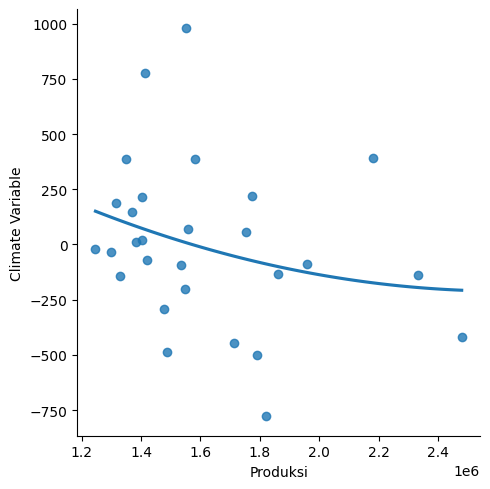

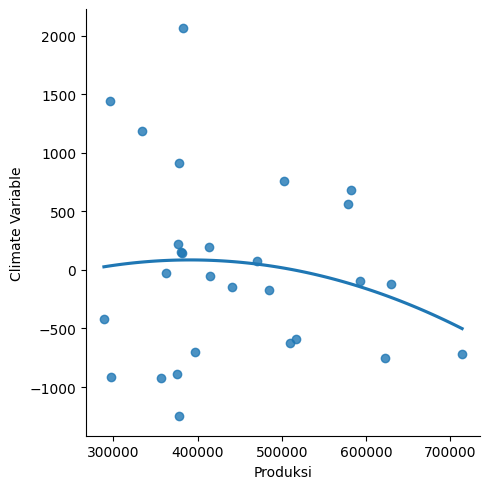

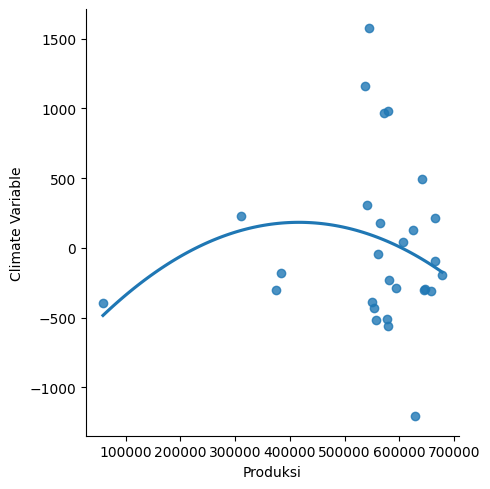

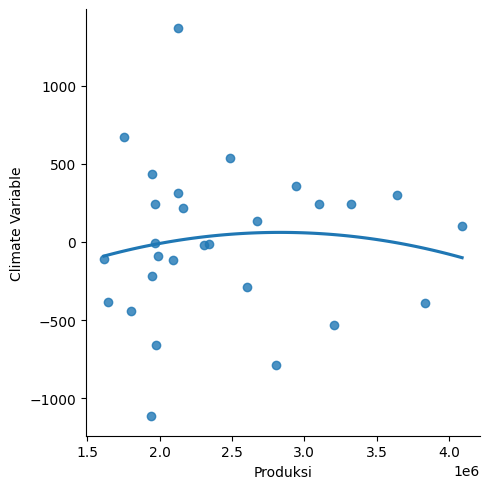

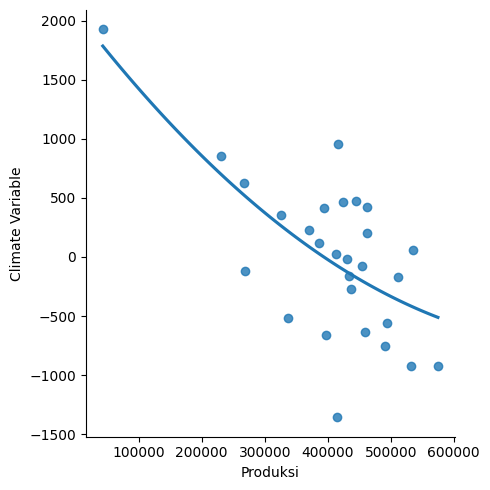

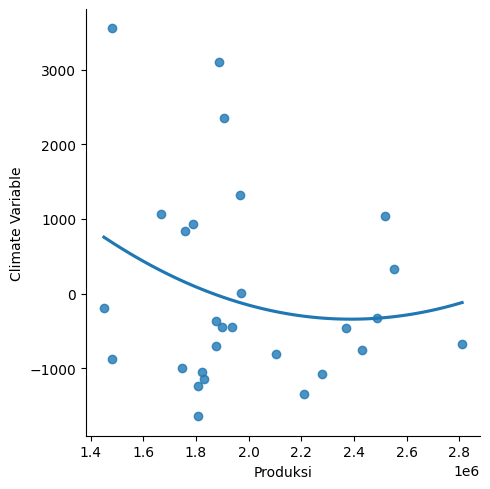

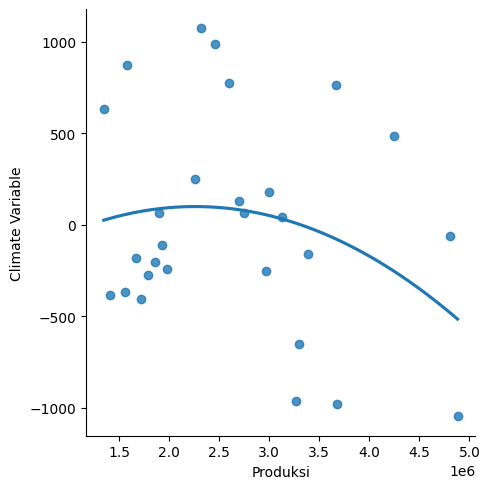

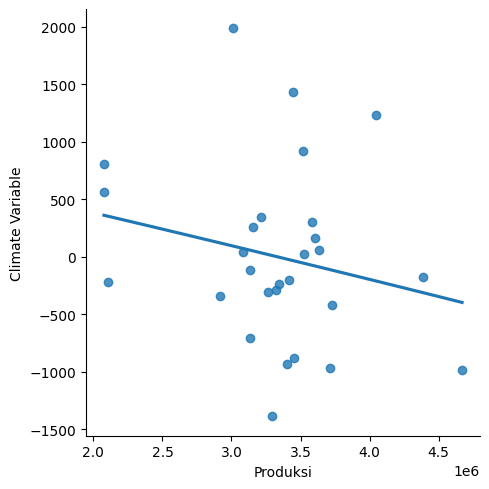

In [ ]:
for province in provinces:
  print(province)

  data_provinsi = data.get_group(province)


  print(data_provinsi.head())

  pca = PCA(n_components = 1)

  climate_var = data_provinsi[['Curah hujan','Kelembapan','Suhu rata-rata']]
  climate_data = pca.fit_transform(climate_var)

  data_provinsi['Climate Variable'] = climate_data

  x = data_provinsi[['Luas Panen','Climate Variable']]
  y = data_provinsi[['Produksi']]

  sns.lmplot(x ="Produksi", y ="Climate Variable", data = data_provinsi, order = 2, ci = None)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
  mlr = LinearRegression()  
  mlr.fit(x_train, y_train)

  y_pred_mlr = mlr.predict(x_test)

  meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
  meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
  rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
  print('R squared: {:.4f}'.format(mlr.score(x_test,y_test)*100))
  print('Mean Absolute Error:', meanAbErr)
  print('Mean Square Error:', meanSqErr)
  print('Root Mean Square Error:', rootMeanSqErr)


In [ ]:
for province in provinces:
  print(province)

  data_provinsi = data.get_group(province)

  print(data_provinsi.head())

  x = data_provinsi[['Luas Panen','Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
  y = data_provinsi[['Produksi']]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=None, shuffle=False, stratify=None)
  mlr = LinearRegression()  
  mlr.fit(x_train, y_train)

  y_pred_mlr = mlr.predict(x_test)

  meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
  meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
  rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
  print('R squared: {:.4f}'.format(mlr.score(x_test,y_test)*100))
  print('Mean Absolute Error:', meanAbErr)
  print('Mean Square Error:', meanSqErr)
  print('Root Mean Square Error:', rootMeanSqErr)


Aceh
  Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
0     Aceh   1993  1329536.0    323589.0       1627.0       82.00   
1     Aceh   1994  1299699.0    329041.0       1521.0       82.12   
2     Aceh   1995  1382905.0    339253.0       1476.0       82.72   
3     Aceh   1996  1419128.0    348223.0       1557.0       83.00   
4     Aceh   1997  1368074.0    337561.0       1339.0       82.46   

   Suhu rata-rata  
0           26.06  
1           26.92  
2           26.27  
3           26.08  
4           26.31  
R squared: -580.4089
Mean Absolute Error: 518994.4624755084
Mean Square Error: 437964051232.01337
Root Mean Square Error: 661788.5245544935
Bengkulu
     Provinsi  Tahun  Produksi  Luas Panen  Curah hujan  Kelembapan  \
168  Bengkulu   1993  356709.0    109807.0       4150.0       85.50   
169  Bengkulu   1994  334232.0    104747.0       2043.0       85.32   
170  Bengkulu   1995  377337.0    115914.0       4478.0       85.49   
171  Bengkulu   1996  39697

In [ ]:
pca = PCA(n_components = 1)

climate_var = data[['Curah hujan','Kelembapan','Suhu rata-rata']]
climate_data = pca.fit_transform(climate_var)

data['Climate Variable'] = climate_data


x = data[['Luas Panen','Climate Variable']]
y = data[['Produksi']]

ValueError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")


for var, coeff in zip(list(x), mlr.coef_[0]):
  print(f'Variable {var} : {coeff}')

Intercept:  [-1532.88896431]
Coefficients:
Variable Luas Panen : 4.548007680765616
Variable Climate Variable : 44.47844763714028


In [ ]:
#Prediction of test set
y_pred_mlr = mlr.predict(x_test)
#Predicted values
print(f"Prediction for test set: \n{y_pred_mlr}")

Prediction for test set: 
[[ 665397.51056498]
 [ 526935.91459118]
 [ 750886.11746788]
 [2696010.45908905]
 [1824266.21299305]
 [2163502.66603643]
 [3425538.66730848]
 [ 615736.43564941]
 [ 351399.54891512]
 [1921763.49556919]
 [2018541.17492995]
 [1385228.89069037]
 [3105730.59880697]
 [ 667126.50641541]
 [2209830.75253236]
 [ 377401.49320043]
 [ 417918.09603343]
 [ 589510.59013986]
 [3385253.1305585 ]
 [3586021.26411403]
 [2047759.16781847]
 [ 583975.7235847 ]
 [2914652.68993034]
 [1327700.81966129]
 [2249147.11362757]
 [2318542.67826886]
 [3599577.23665366]
 [2549442.91308877]
 [ 532629.76404904]
 [ 545294.21408448]
 [ 261754.45877463]
 [ 700228.80385245]
 [ 459376.82421047]
 [3413219.37645773]
 [1415215.8354222 ]
 [1917040.55209917]
 [ 547783.1848289 ]
 [2423276.29196888]
 [1701952.47445945]
 [ 642768.23741657]
 [3590197.44468791]
 [ 592775.67572724]
 [3178450.66493121]
 [1271003.50349929]
 [2056342.09353928]
 [2215399.81618766]
 [ 580899.4761522 ]
 [2147123.89372723]
 [1625333.1759

In [ ]:
#Actual value and the predicted value

y_test = np.array(y_test)

for i in range(len(y_test)):
  print(f'Actual Value : {y_test[i]} | Predicted Value : {y_pred_mlr[i]}')

Actual Value : [510160.] | Predicted Value : [665397.51056498]
Actual Value : [413375.] | Predicted Value : [526935.91459118]
Actual Value : [556564.] | Predicted Value : [750886.11746788]
Actual Value : [2807676.] | Predicted Value : [2696010.45908905]
Actual Value : [1889489.] | Predicted Value : [1824266.21299305]
Actual Value : [1801422.] | Predicted Value : [2163502.66603643]
Actual Value : [3607403.] | Predicted Value : [3425538.66730848]
Actual Value : [377337.] | Predicted Value : [615736.43564941]
Actual Value : [288810.52] | Predicted Value : [351399.54891512]
Actual Value : [4669777.5] | Predicted Value : [1921763.49556919]
Actual Value : [1971180.] | Predicted Value : [2018541.17492995]
Actual Value : [1714437.6] | Predicted Value : [1385228.89069037]
Actual Value : [3007636.] | Predicted Value : [3105730.59880697]
Actual Value : [516869.] | Predicted Value : [667126.50641541]
Actual Value : [2279602.] | Predicted Value : [2209830.75253236]
Actual Value : [374376.27] | Pred

In [ ]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.4f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 82.1586
Mean Absolute Error: 260885.54808355228
Mean Square Error: 192551530859.415
Root Mean Square Error: 438806.9403045205
